# PREDICTION WITH ARIMA

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error 
from statsmodels.tsa.arima.model import ARIMA
 

In [14]:
# read dataset may2023
df = pd.read_pickle("../../data/20230319_RTU_Dataset_PPC-Lab/df1.pkl")  

In [15]:
df

,MEM_USAGE,CPU_USAGE,TEMP
time,,,
2023-01-30 12:11:56.788,35.555417,27.343750,28.687
2023-01-30 12:16:57.191,35.555417,6.367041,28.687
2023-01-30 12:21:57.606,35.555417,7.142857,28.687
2023-01-30 12:26:58.001,35.555417,27.306273,28.687
2023-01-30 12:31:58.396,35.555417,5.639098,28.687
...,...,...,...
2023-02-09 16:53:01.209,24.758905,72.426471,32.000
2023-02-09 16:58:02.548,24.758905,22.556391,23.750
2023-02-09 17:03:03.007,24.758905,8.267717,23.750


In [16]:
LAG = 12   # ---------- 1H

In [17]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# TEMP

In [18]:
training_size = int(len(df) * 0.8)

train = [[i] for i in df["TEMP"]][:training_size]
test = [[i] for i in df["TEMP"]][training_size:]

len(train)


2222

In [19]:
arima = ARIMA(train, order=(LAG,0,0))
arima_fit = arima.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2222
Model:                ARIMA(12, 0, 0)   Log Likelihood                 790.485
Date:                Mon, 12 Jun 2023   AIC                          -1552.969
Time:                        14:18:33   BIC                          -1473.083
Sample:                             0   HQIC                         -1523.792
                               - 2222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4215      1.454     17.487      0.000      22.572      28.271
ar.L1          0.9986      0.733      1.363      0.173      -0.437       2.434
ar.L2       1.021e-08      1.046   9.76e-09      1.0

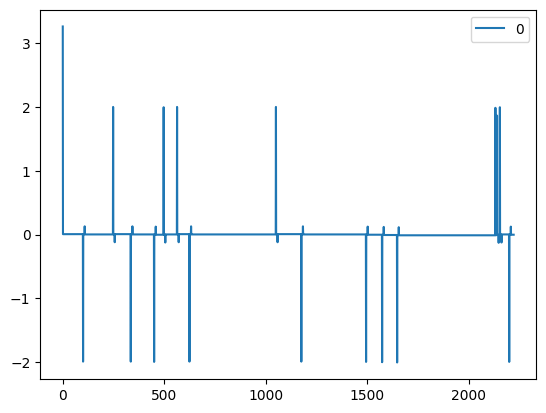

In [20]:
residuals = pd.DataFrame(arima_fit.resid)
residuals.plot()
plt.show()

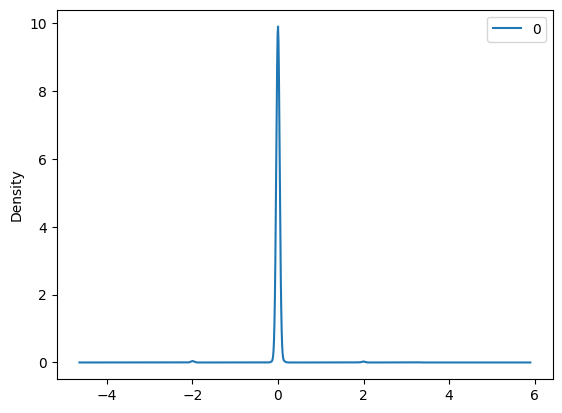

                 0
count  2222.000000
mean     -0.000200
std       0.182935
min      -2.006206
25%      -0.006206
50%       0.002872
75%       0.002872
max       3.265524


In [21]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [22]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    output = arima_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted', yhat, obs)    
    # print('actual', obs)

Test MAPE: 16.264
Test RMSE: 3.750


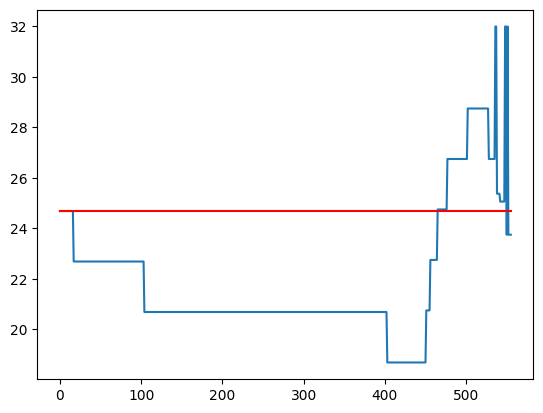

In [23]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# CPU

In [24]:
training_size = int(len(df) * 0.8)

train = [[i] for i in df["CPU_USAGE"]][:training_size]
test = [[i] for i in df["CPU_USAGE"]][training_size:]

arima = ARIMA(train, order=(LAG,0,0))
arima_fit = arima.fit()
print(arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2222
Model:                ARIMA(12, 0, 0)   Log Likelihood               -8460.985
Date:                Mon, 12 Jun 2023   AIC                          16949.969
Time:                        14:18:44   BIC                          17029.856
Sample:                             0   HQIC                         16979.146
                               - 2222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9260      0.457     30.499      0.000      13.031      14.821
ar.L1         -0.0355      0.022     -1.597      0.110      -0.079       0.008
ar.L2          0.0076      0.021      0.368      0.7

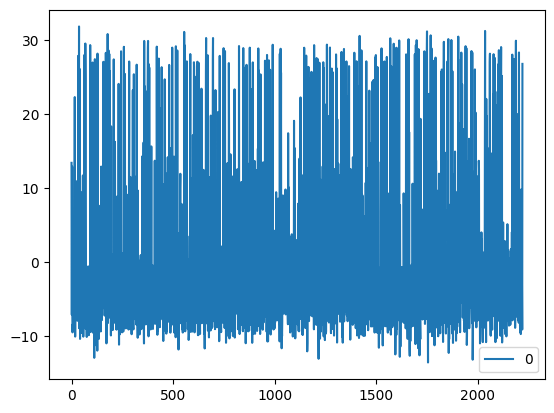

In [25]:
residuals = pd.DataFrame(arima_fit.resid)
residuals.plot()
plt.show()

In [26]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    output = arima_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted', yhat, obs)    
    # print('actual', obs)

Test MAPE: 72.176
Test RMSE: 11.992


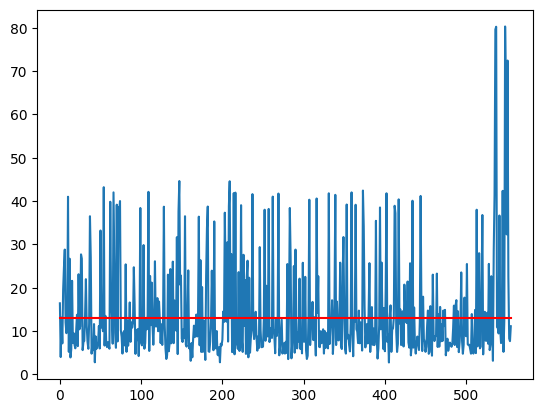

In [27]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# MEM_USAGE

In [28]:
training_size = int(len(df) * 0.8)

train = [[i] for i in df["CPU_USAGE"]][:training_size]
test = [[i] for i in df["CPU_USAGE"]][training_size:]

arima = ARIMA(train, order=(LAG,0,0))
arima_fit = arima.fit()
print(arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2222
Model:                ARIMA(12, 0, 0)   Log Likelihood               -8460.985
Date:                Mon, 12 Jun 2023   AIC                          16949.969
Time:                        14:18:49   BIC                          17029.856
Sample:                             0   HQIC                         16979.146
                               - 2222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9260      0.457     30.499      0.000      13.031      14.821
ar.L1         -0.0355      0.022     -1.597      0.110      -0.079       0.008
ar.L2          0.0076      0.021      0.368      0.7

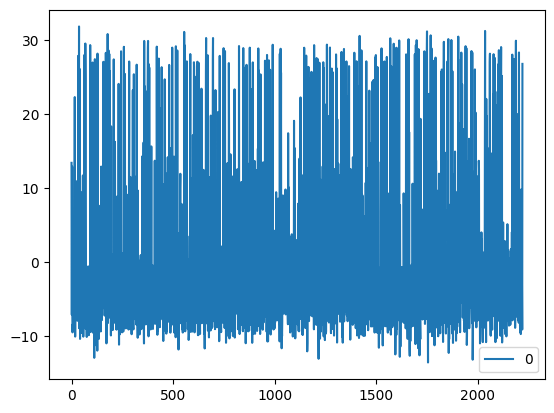

In [29]:
residuals = pd.DataFrame(arima_fit.resid)
residuals.plot()
plt.show()

In [30]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    output = arima_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted', yhat, obs)    
    # print('actual', obs)

Test MAPE: 72.176
Test RMSE: 11.992


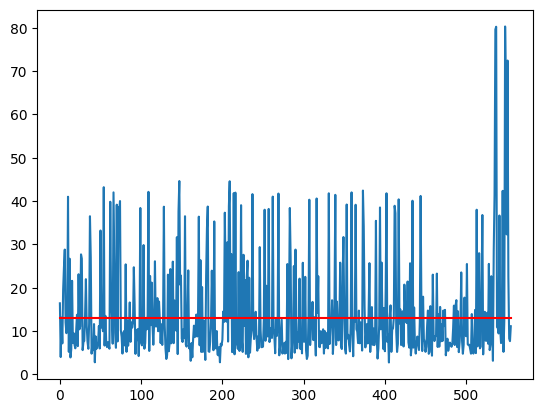

In [31]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()